# Time series data

In [4]:
import pandas as pd

occupancy = pd.read_csv("./data/occupancy.csv")
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
occupancy.shape

(2664, 7)

In [11]:
occupancy.index = pd.DatetimeIndex(occupancy.date, freq="H")

In [12]:
occupancy.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [14]:
occupancy.drop(columns=["date"], inplace=True)

In [15]:
occupancy

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:00:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,23.718000,26.290000,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2015-05-24 09:00:00,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2015-05-24 10:00:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2015-05-24 11:00:00,24.330000,25.700000,817.000000,1125.800000,0.004841,1


In [36]:
index = pd.date_range('2015-05-01', periods=24*7, freq="H")
week = occupancy.loc[index]
week

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2015-05-01 00:00:00,20.79,24.945000,0.0,526.000000,0.003783,0
2015-05-01 01:00:00,20.79,24.956000,0.0,519.600000,0.003785,0
2015-05-01 02:00:00,20.79,24.963333,0.0,518.333333,0.003786,0
2015-05-01 03:00:00,20.79,24.972500,0.0,520.500000,0.003787,0
2015-05-01 04:00:00,20.79,24.945000,0.0,521.750000,0.003783,0
...,...,...,...,...,...,...
2015-05-07 19:00:00,20.70,24.600000,0.0,472.500000,0.003710,0
2015-05-07 20:00:00,20.70,24.600000,0.0,471.600000,0.003710,0
2015-05-07 21:00:00,20.70,24.600000,0.0,474.750000,0.003710,0
2015-05-07 22:00:00,20.70,24.600000,0.0,475.666667,0.003710,0


In [96]:
week.index.values.iteritems()

AttributeError: 'numpy.ndarray' object has no attribute 'iteritems'

In [88]:
import datetime
m = set([pd.to_datetime(str(q)).strftime('%Y-%m-%d') for q in week.index.values])
m

{'2015-05-01',
 '2015-05-02',
 '2015-05-03',
 '2015-05-04',
 '2015-05-05',
 '2015-05-06',
 '2015-05-07'}

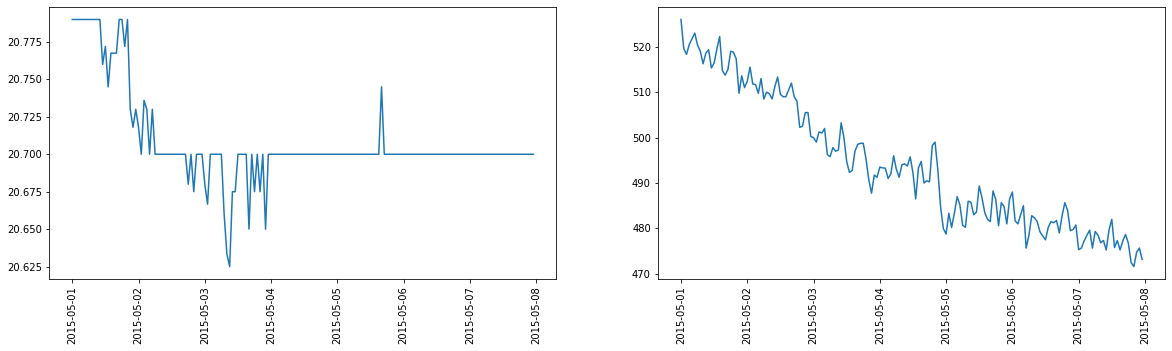

In [109]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(week[["Temperature"]])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.plot(week[["CO2"]])
plt.xticks(rotation=90)

#plt.xticks(range(0,168,7),list(m),rotation=90)
plt.show()

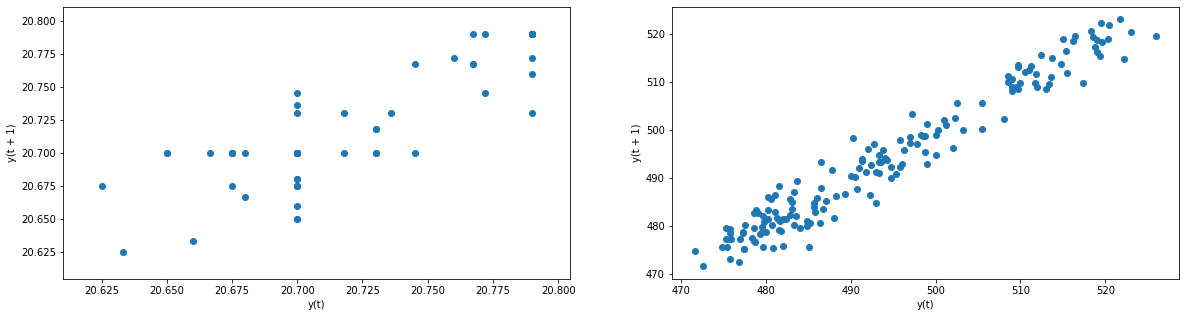

In [113]:
# Autocorrelación

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
pd.plotting.lag_plot(week["Temperature"])
plt.subplot(1,2,2)
pd.plotting.lag_plot(week["CO2"])


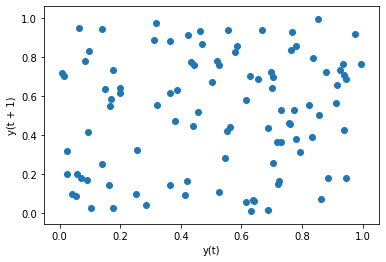

In [119]:
q = pd.Series(np.random.random((100)))
pd.plotting.lag_plot(q)

In [124]:
from statsmodels.tsa.stattools import adfuller

 = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

[(col,stationaryCheck(week[col])) for col in week.columns]


/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


[('Temperature', 'Stationary'),
 ('Humidity', 'Not-Stationary'),
 ('Light', 'Stationary'),
 ('CO2', 'Not-Stationary'),
 ('HumidityRatio', 'Not-Stationary'),
 ('Occupancy', 'Stationary')]

In [128]:
stationaryCheck(pd.Series(np.random.random((100))))

'Stationary'

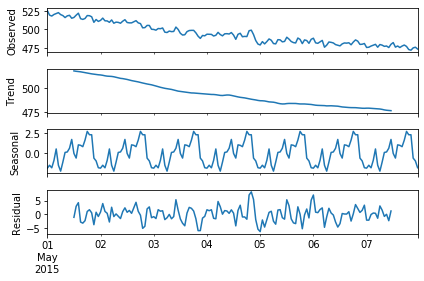

In [133]:
import statsmodels.api as sm


res = sm.tsa.seasonal_decompose(week["CO2"])

res.plot()
plt.show()

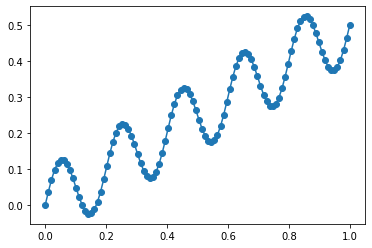

In [149]:
x = np.linspace(0,1,100)

trend = 0.5*x
season = np.sin(2*np.pi*5*x)

y = season*0.1 + trend
 
plt.plot(x,y,'o-')

# Filtering time series data

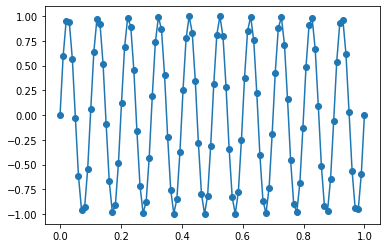

In [155]:
Fm = 100
F = 10
X = np.linspace(0,1,Fm)
Y = np.sin(2*np.pi*F*X)
plt.plot(X,Y,'-o')

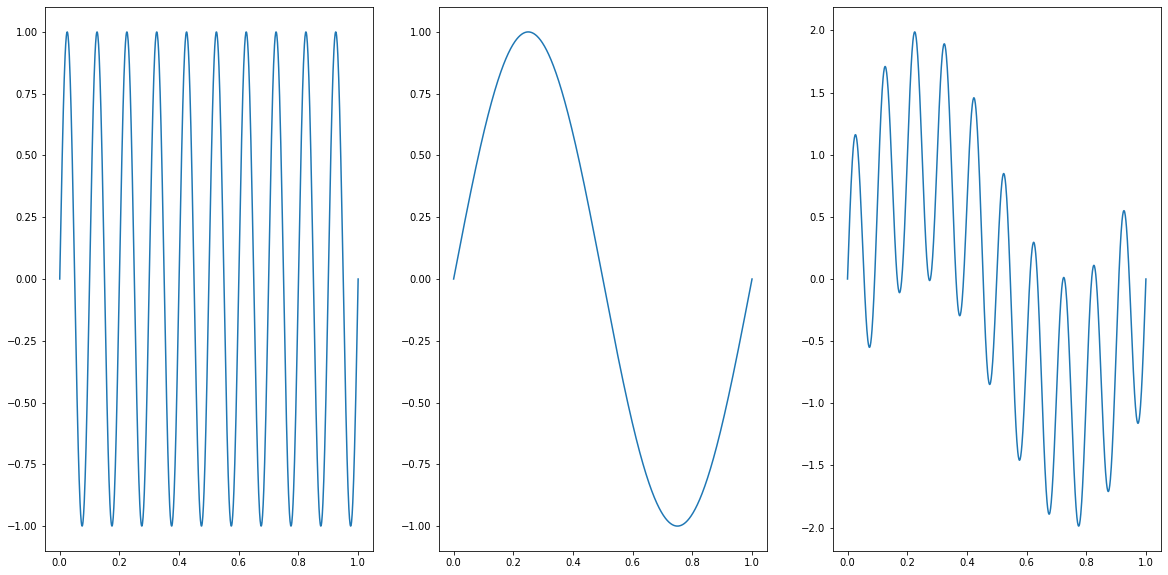

In [156]:
Fm = 1000
F = 10
X = np.linspace(0,1,Fm)

plt.figure(figsize=(20,10))

#A
plt.subplot(1,3,1)
a = np.sin(2*np.pi*F*X)
plt.plot(X,a)

#B
plt.subplot(1,3,2)
b = np.sin(2*np.pi*X)
plt.plot(X,b)

#C
plt.subplot(1,3,3)
Y = a+b
plt.plot(X,Y)

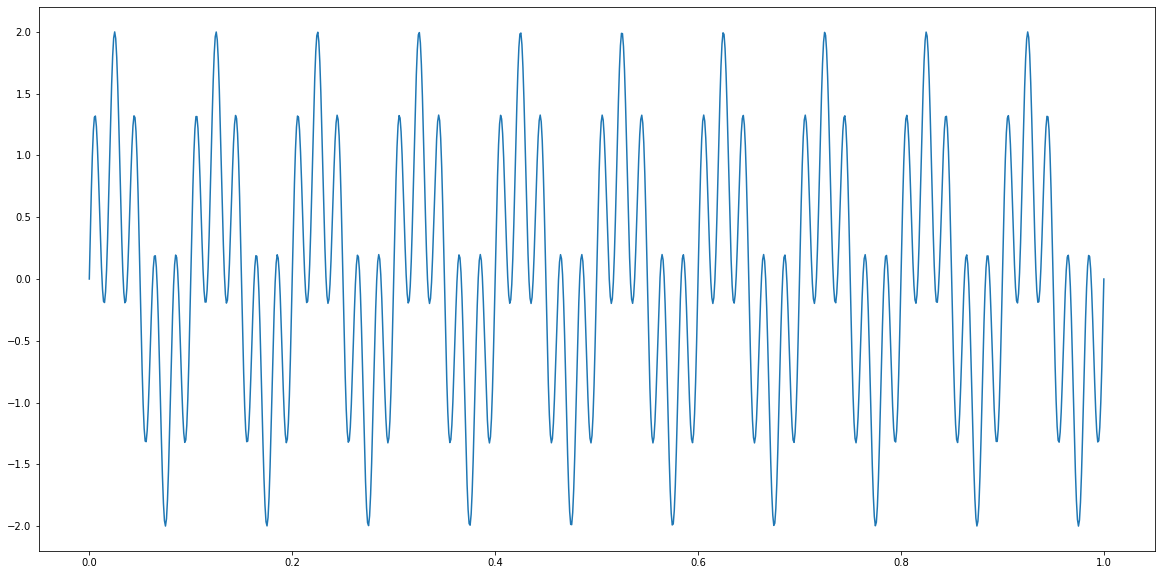

In [179]:
Fm = 1000
X = np.linspace(0,1,Fm)

Y = np.sin(2*np.pi*50*X) + np.sin(2*np.pi*10*X) #+ np.sin(2*np.pi*100*X)

plt.figure(figsize=(20,10))
plt.plot(X,Y)

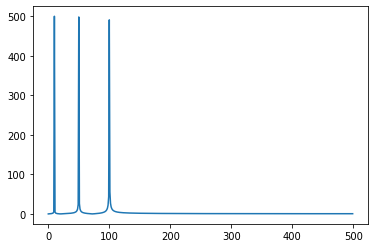

In [167]:
## Calculo de la FFT
from scipy.fftpack import fft
mod = np.abs(fft(Y))
mod = mod[0:len(mod)//2]
plt.plot(mod)

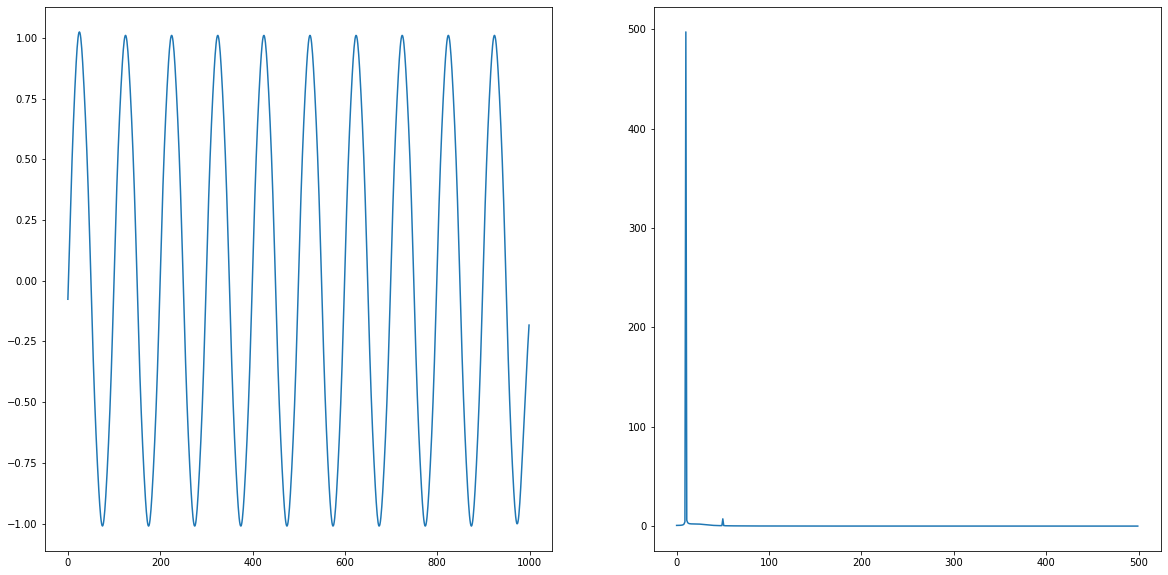

In [180]:
from scipy import signal
norm = 1/Fm
b, a = signal.butter(3, norm * 50)
data_filtered = signal.filtfilt(b, a, Y)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(data_filtered)
mod = np.abs(fft(data_filtered))
mod = mod[0:len(mod)//2]
plt.subplot(1,2,2)
plt.plot(mod)

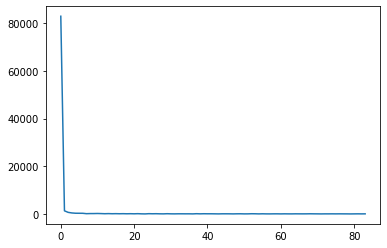

In [183]:
mod = np.abs(fft(week["CO2"].values))
mod = mod[0:len(mod)//2]
plt.plot(mod)

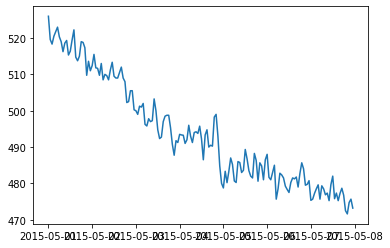

In [184]:
plt.plot(week["CO2"])

In [185]:
norm = 1/Fm
b, a = signal.butter(3, norm * 50)
data_filtered = signal.filtfilt(b, a, week["CO2"])

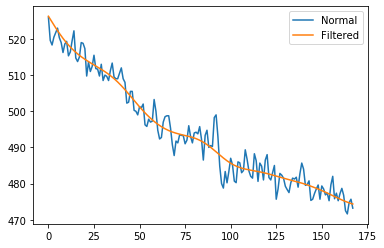

In [190]:
plt.figure()
plt.plot(week["CO2"].values)
plt.plot(data_filtered)
plt.legend(["Normal","Filtered"])

,X,Xf
2015-05-01 00:00:00,526.000000,526.286449
2015-05-01 01:00:00,519.600000,525.469300
2015-05-01 02:00:00,518.333333,524.656285
2015-05-01 03:00:00,520.500000,523.853537
2015-05-01 04:00:00,521.750000,523.066633
...,...,...
2015-05-07 19:00:00,472.500000,475.040383
2015-05-07 20:00:00,471.600000,474.842206
2015-05-07 21:00:00,474.750000,474.658937
2015-05-07 22:00:00,475.666667,474.492291


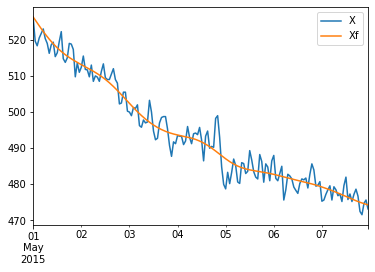

In [192]:
# y(t) = y(t-1)*A + y(t-2)*B + y(t-3)*C + ..... + y(t-n)*L


# AR Model
df = pd.DataFrame({
    "X":week.CO2,
    "Xf": data_filtered 
},index=week.index)

display(df)

df.plot()

In [198]:
df.shape

presente = df.loc[df.index[0:150]]
futuro = df.loc[df.index[150:168]]
print(presente.shape, futuro.shape)

(150, 2) (18, 2)


In [214]:
from statsmodels.tsa.ar_model import AR


# q(t) = y(t-1)*A + y(t-2)*B + y(t-3)*C + ..... + y(t-n)*L + Z*mean(y(t-1) ....y(t-n))

#q(t) similar y(t)

#500 = 502*A + 504*B
#515 = 516*A + 518*B

model = AR(presente.Xf)
fitted_model = model.fit(maxlag=5)

In [217]:
predicted_data = fitted_model.predict(start=len(presente),end=len(presente)+len(futuro)-1, dynamic=False)

df = pd.DataFrame({
    "GT":futuro.Xf,
    "y":predicted_data,
    "diff": futuro.X - predicted_data
})

display(df)

print("MSE",sum(df["diff"]**2)/ len(df["diff"]))

,GT,y,diff
2015-05-07 06:00:00,478.059047,478.059061,1.274273
2015-05-07 07:00:00,477.837436,477.837516,0.662484
2015-05-07 08:00:00,477.610869,477.611139,-0.753997
2015-05-07 09:00:00,477.379697,477.380389,-0.047056
2015-05-07 10:00:00,477.144421,477.145908,-1.895908
2015-05-07 11:00:00,476.905734,476.908553,2.758114
2015-05-07 12:00:00,476.664566,476.669410,5.330590
2015-05-07 13:00:00,476.422122,476.429802,-0.629802
2015-05-07 14:00:00,476.179896,476.191276,1.142057
2015-05-07 15:00:00,475.939648,475.955581,-0.705581


MSE 4.396236322103127
